In [1]:
import pandas as pd

## Importation des données

In [2]:
df2 = pd.read_csv("Questionnaires.csv",sep=";")

In [3]:
df2.head()

,AGE,ID_NUM_TEL,SEXE,NIVEAU_SUPERIEUR_CHOIX,TYPE_TELEPHONE,ABONNEMENT_ILLIMITE,TEMPS_UTILISATION_SMS,ENVOI_SMS_SEMAINE,UTILISATION_T9,DESTINATAIRE_AMIS,DESTINATAIRE_COLLEGUES,DESTINATAIRE_FAMILLE,DESTINATAIRE_COMPAGNON,DUREE_LECTURE
0,16,202,Femme,lycee,classique,non,1 a 3,moins de 5,non,5,3,4,0,"4,19"
1,11,401,Homme,college,autre,oui,moins de 1,20 a 50,non,6,0,1,0,"5,24"
2,15,290,Homme,college,blackberry,non,1 a 3,plus de 100,oui,6,0,6,6,"3,14"
3,12,271,Homme,college,blackberry,oui,1 a 3,plus de 100,non,5,0,2,6,"1,05"
4,14,75,Femme,college,blackberry,oui,plus de 5,plus de 100,non,6,0,2,0,"6,29"


In [4]:
df = pd.read_csv("BDD_sms.csv",sep=";",encoding = "ISO-8859-1")

In [5]:
df.head()

,NUM_SMS,ID_NUM_TEL,SMS_ANON
0,1,477,Hey ca va?\nAlors cette rentree?\nVa falloir s...
1,2,477,Ok super merci! Oui j'y comprends rien du tout...
2,3,477,Coucou !\nC'est quand la feria de Nimes?\nJ'su...
3,4,477,Coucou :)\nOui ca c'est bien passe!\nAlors je ...
4,5,477,On peut se rejoindre quelque part? Tu as cours...


## Merge des sms avec les données utilisateurs

In [6]:
df = df.merge(df2, how='left', on='ID_NUM_TEL') # On fusionne les deux dataframes par rapport à leur colonnes ID_NUM_TEL

## Création des corpus AGE

In [7]:
from matplotlib import pyplot as plt
age = df["AGE"]
plt.hist(age)
plt.xlabel("Age")
plt.ylabel("Effectif")
plt.show()

<Figure size 640x480 with 1 Axes>

In [8]:
labels = [1,2,3,4,5] # Catégorie 
df["Agegroup"]=pd.qcut(df['AGE'], q=5, labels=labels) # On crée une nouvelle colonnes avec les catégories

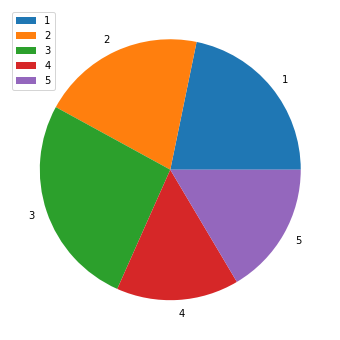

In [9]:
compte = df.groupby(["Agegroup"]).count() 
compte.plot.pie(y='ID_NUM_TEL', figsize=(6, 6)) 
plt.ylabel("")
plt.show()

In [10]:
corpus_age = df[["SMS_ANON","AGE","Agegroup"]] # Selection des bonnes colonnes 
corpus_age1=corpus_age.query('Agegroup==1')
corpus_age2=corpus_age.query('Agegroup==2')
corpus_age3=corpus_age.query('Agegroup==3')
corpus_age4=corpus_age.query('Agegroup==4')
corpus_age5=corpus_age.query('Agegroup==5')

## Création du corpus SEXE

In [11]:
corpus_sexe = df[["SMS_ANON","SEXE"]] # Selection des bonnes colonnes 
corpus_Femme=corpus_sexe.query("SEXE=='Femme'")
corpus_Homme=corpus_sexe.query("SEXE=='Homme'")


## Sauvegarde des dataframes en csv

In [12]:
corpus_age1.to_csv("corpus_age1.csv",index = False)
corpus_Femme.to_csv("corpus_Femme.csv",index = False)